<font size=7><p style="text-align: center;">Clustering</p></font>
<br>Clustering is a unsupervised machine learning technique of partitioning the data into a number of groups in such a way that the points or observations within a group are more similar to each other compared to the other groups. It is a part of Unsupervised learning because to perform clustering you do not need labeled data. The algorithm tries to find patterns, similarities and dissimilarities among data points and group them together.<br>
Applications of clustering ranges many fields, some of which are:
1. Image segmentation
2. Anomaly detection
3. Customer segmentation
4. Document clustering
5. Recommendation systems

In [169]:
from clustering import *
from sklearn import datasets
import matplotlib.pyplot as plt

Text(0, 0.5, 'Feature X2')

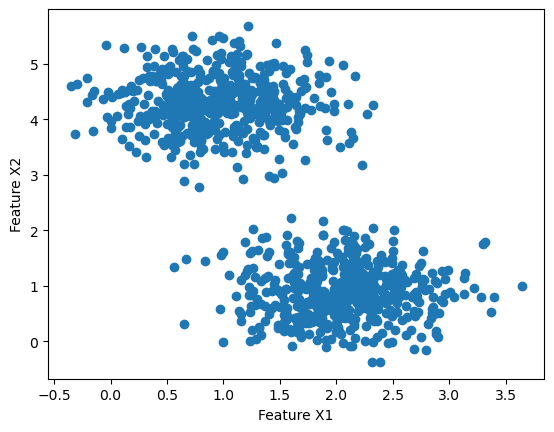

In [170]:
centers=2
X, y = datasets.make_blobs(n_samples=1000, centers=centers, cluster_std=0.5, n_features=2,random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')


Can you identify any similarity or differences amongs the points shown above? <br>
Visually it seems pretty clear that the points with high Feature X1 value and low Feature X2 value are similar to each other and the points with low Feature X1 and high Feature X2 value are similar to each other.

It is easier to visualize when we are dealing with low dimension. What if we had more features?

### How do we cluster them?
In this notebook, we will be cover 3 types of clustering algorithms:
1. kmeans clustering
2. kmeans++ clustering
3. spectral clustering


<font size=6><p style="text-align: center;">K-means</p></font><br>



The idea of k-means was initially proposed in 1956 by Hugo Steinhaus and a standard algorithm for this was proposed in 1957 by Stuart Loyd. Kmeans is based on the vector quantization method used in signal processing where multiple data points from a large continuous signal data can be grouped together and represented in a discreet fashion (converting analog to digital signal). <br>
In kmeans, the data is grouped into k clusters where each observation goes to the cluster with smallest distance to the centroid (nearest mean) of the cluster. The outcome of this is that the data region gets partitioned into regions, these regions are also called as Voronoi cells as shown in the figure below. The kmeans clustering tries to reduce the within cluster variances (or squared Euclidean distances). 

In [171]:
from IPython.display import Image
Image(url='voronoi.png', width=500) 

### How does it work?
Kmeans is an iterative method that tries to find the optimal clusters and centroids. Steps in kmeans clustering:
1. Define k as number of clusters you want your data to be grouped into.
2. Choose k points at random from the data set and initialize them as centroids to cluster the data.
3. Generate k clusters from the centroids: Calculate distance from each point to all the centroid and for any point if the distance to centroid 'a' is less than centroid 'b' then the point gets assigned to the cluster with centroid 'a'.
4. Compute the new centroid for each cluster based on the point assignment.
5. Repeat steps 3-4 for n iterations or till the centroids aren't changing much.

In [172]:
from IPython.display import Image
Image(url='cluster.gif') 

#### Lets walk through an example
Below figure shows the data with 1000 points that seems to have 3 blobs or clusters spread with some variation in 2 dimension.

Text(0, 0.5, 'Feature X2')

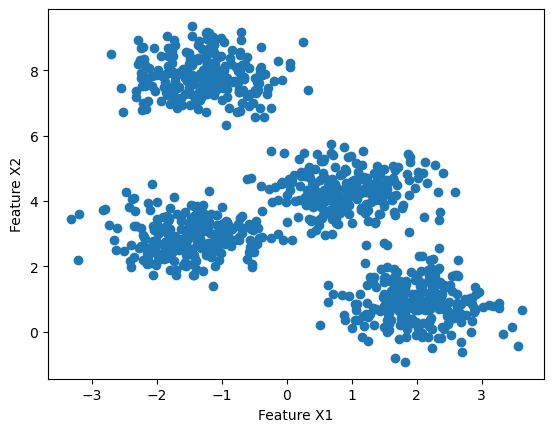

In [173]:
centers=4
X, y = datasets.make_blobs(n_samples=1000, centers=centers, cluster_std=0.6, n_features=2,random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')

We first initialize our centroid points randomly. You can change the random_state to choose different set of random points. In my example I am keeping the random_state fixed to 47. In the figure below you can see the initial center points in red.

Text(0, 0.5, 'Feature X2')

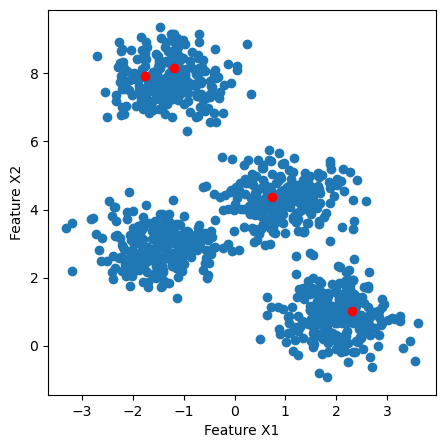

In [174]:
k=Kmeans(nclusters=centers, random_state=47)
center_init=k.init_centroids(X)
fig, axs = plt.subplots(figsize=(5, 5))
axs.scatter(X[:, 0], X[:, 1])
axs.scatter(center_init[:,0], center_init[:,1], color='red')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')

Lets find cluster using clustering.kmeans class. (For any implementation details check clustering.py)

Text(0, 0.5, 'Feature X2')

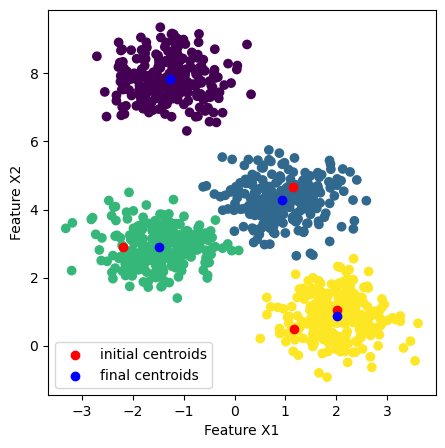

In [175]:
fig, axs = plt.subplots(figsize=(5, 5))
k=Kmeans(nclusters=centers, random_state=2)
y_pred = k.fit_predict(X)
center_init, final_centroid = k.return_centroids(X)
axs.scatter(X[:, 0], X[:, 1], c=y_pred)
axs.scatter(center_init[:,0], center_init[:,1], color='red', label='initial centroids')
axs.scatter(final_centroid[:,0], final_centroid[:,1], color='blue', label='final centroids')
plt.legend(loc='lower left')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')

Red points represent the initial centroids chosen and blue points represent the final centroid points after fitting. The figure shows how due to the centroids the algorithm was able to find the closest points to the centroid and group them together.

#### How do we choose optimal number of clusters?
It is easy to define number of clusters and ask the algorithm to do the magic to get the clusters but many times you don't know how many clusters you should go for. There are some methods to find the optimal number of clusters, of these 2 major methods are:
1. Elbow method
2. Silhouette method

#### 1. Elbow method:
In this method, we plot the within cluster sum of squares (WSS) against the number of clusters. The WSS is the sum of the squared distances between each point and its cluster centroid. The idea is to choose the number of clusters at which the reduction in WSS begins to go off or where it jumps the most forming a shape like elbow. The optimal number of clusters should explain most of the variation in the data while keeping the number of clusters as low as possible.
Lets check how many clusters should we use for the above example.

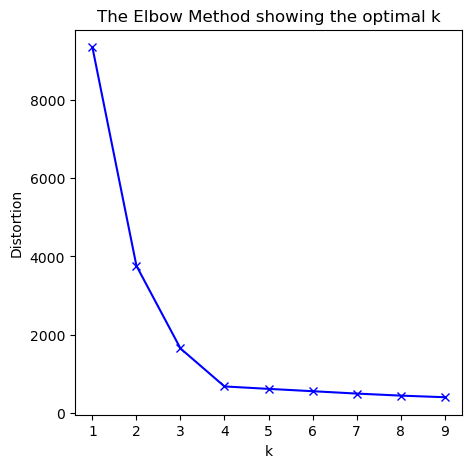

In [176]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit_predict(X)
    distortions.append(kmeanModel.inertia_)
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

It is clear from the elbow plot that there is huge jump at 4 and it tapers after that. Therefore, we should go for 4 clusters to partition this dataset.

#### 2. Silhouette Method
In this method, we calculate average distance between points in the same cluster (intra-cluster distance) and the average distance between points in different clusters (inter-cluster distance). Following this we calculate silhouette score. The silhouette score is a value between -1 and 1 that measures how similar a data point is to its own cluster compared to other clusters, a high score implies better clustering. We calculate this for k clusters and choose the k with highest slihouette score.<br>
Silhouette score, S, for each sample is calculated using the following formula:<br>
$$ S={{(𝑏–𝑎)}\over{𝑚𝑎𝑥(𝑎,𝑏)}}$$


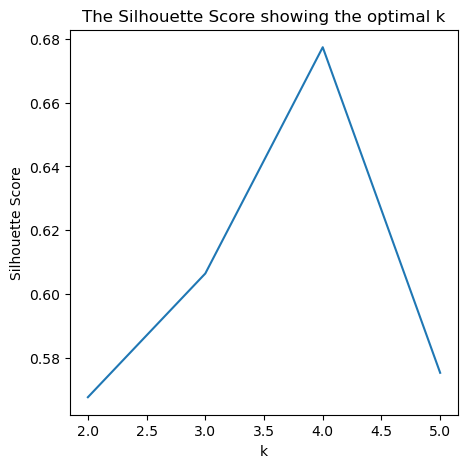

In [177]:
from sklearn.metrics import silhouette_score
fig, ax = plt.subplots(figsize=(5,5))
K=range(2,6)
score=[]
for i in K:
    k = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    k.fit_predict(X)
    q, mod = divmod(i, 2)
    score.append(silhouette_score(X, k.labels_, metric='euclidean'))
ax.plot(K,score)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Score showing the optimal k')
plt.show()

It is clear from the above plot that the highest silhouette score is when the number of clusters are 4. So choosing 4 clusters to cluster this data would be the better than choosing a lower or higher number of clusters.

#### Time Complexity of Kmeans Algorithm
The time complexity of kmenas algorithm depends on number of data points (n), number of clusters (k), number of iterations (i) and number of dimensions (d). Steps in kmeans:
1. Centroid initialization for k clusters, since here it is random initialization, it doesn't taken more time.
2. Assign each data point to its closest centroid (using a distance metric such as Euclidean distance). This step takes O(k * n * d) time
3. Recalculate the centroid based on new data points for each cluster. For this step time complexity is O(k * d)
4. Repeat steps 2 and 3 till convergence or i times. This combines the above two steps and hence has overall time complexity of O(i * k * n * d)
Step 2 takes the most time here in calculating distance of each data point from the cluster and its iterated i times and hence, complexity of this algorithm comes out to be O(n * i * k * d).<br>
Kmeans is generally efficient but for large datasets as well as for very high dimensional data, it can be very slow and memory intensive.

#### Problems with kmeans clustering
The main issues with the k-means clustering algorithm is that it can get trapped in local optima, which means that the quality of the clustering results depends heavily on the initial placement of the centroids. This is because k-means algorithm randomly selects initial centroids, and different random selections can lead to different results.
Here is an example showing initial and final centroids where clustering doesn't happen as per the expectation due to random initialization of centroids.


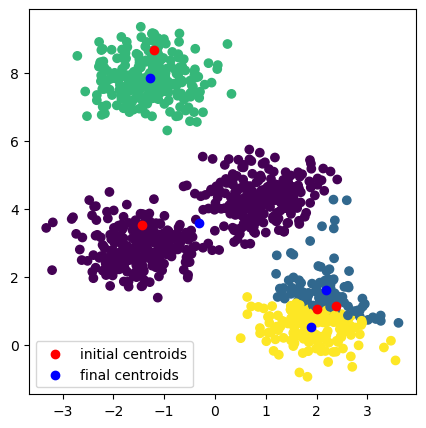

In [178]:
fig, axs = plt.subplots(figsize=(5, 5))
k=Kmeans(nclusters=centers, random_state=10)
y_pred = k.fit_predict(X)
center_init, final_centroid = k.return_centroids(X)
axs.scatter(X[:, 0], X[:, 1], c=y_pred)
axs.scatter(center_init[:,0], center_init[:,1], color='red', label='initial centroids')
axs.scatter(final_centroid[:,0], final_centroid[:,1], color='blue', label='final centroids')
plt.legend(loc='lower left')

If the initial centroids are selected poorly, the algorithm may converge to a suboptimal solution, where the clustering results are not meaningful or useful. To overcome this issue, many techniques can be used to improve the initial centroid selection, like:
1. K-means++ initialization
2. Multiple random initializations
3. Hierarchical clustering initialization

Lets discuss how k-means++ works and helps over come this issue

<font size=6><p style="text-align: center;">K-means++</p></font><br>

#### How does kmeans++ initialization prevents such clusters?
Kmeans++ initialization selects initial centroids away from each other such that the clustering algorithm does not get stuck in local optima. The algorithm works as follows:

1. Choose the first centroid at random from the data points.
2. For each remaining data point, compute the distance between the points and the nearest centroid that has already been chosen and find that minimum.
3. Among the minimum distances to a cluster for each point, find the maximum distance. and choose that point as next centroid.
4. Repeat steps 2 and 3 until all k centroids have been chosen.

#### Lets check how the kmeans++ clustering helps with the above issue
On the same data we use clustering.kmeans_pp fit_predict method. (For any implementation details check clustering.py)

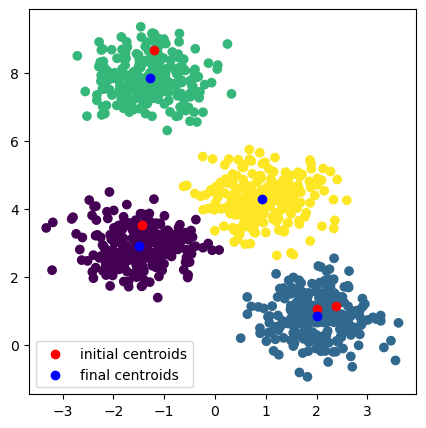

In [179]:
fig, axs = plt.subplots(figsize=(5, 5))
k=Kmeans(nclusters=centers, random_state=10, init_method='kpp')
y_pred = k.fit_predict(X)
center_init, final_centroid = k.return_centroids(X)
axs.scatter(X[:, 0], X[:, 1], c=y_pred)
axs.scatter(center_init[:,0], center_init[:,1], color='red', label='initial centroids')
axs.scatter(final_centroid[:,0], final_centroid[:,1], color='blue', label='final centroids')
plt.legend(loc='lower left')

As it is clear the initial points chosen are very far from each other avoiding the problem of getting stuck in the local optima. At the end, it easily identifies the right centroids and hence right clusters.

### Time complexity of K-means++
The time complexity of kmeans++ should be same as kmeans since there is only one difference in centroid initialization. But, because of the way we initialize our data points, the algorithm doesn't take i iterations (given i is large) and is guaranteed to converge in log(n) time and therefore the time complexity of kmeans++ algorithm is slightly better than kmeans and is given by O(n * k * d * log(n)). 

### Is this algorithm good enough?
It has been shown that k-means++ outperforms other initialization methods, such as random initialization, in terms of clustering accuracy and time taken to converge. However, it is important to note that k-means++ may not always be the best choice for all datasets or clustering tasks, and other initialization methods or clustering algorithms may be more appropriate depending on the specific problem at hand. Few examples where kmeans++ may not be best choice:
1. Non-convex clusters: k-means++ is designed to work with convex clusters (clusters that are roughly spherical or elliptical in shape). If the clusters in the data are non-convex, k-means++ may fail to separate them properly and may group together points from different clusters.
2. Imbalanced clusters: If the data points in each cluster are significantly imbalanced, k-means++ may not be able to identify the correct number of clusters or may group together points from different clusters.
3. Outliers: k-means++ is sensitive to outliers. Outliers can make the centroids to be placed in suboptimal locations leading to poor clustering results.
4. High-dimensional data: k-means++ can struggle with high-dimensional data, as the distance metric used in the algorithm can become less meaningful and lead to poor clustering results.

#### Lets look at one of the example that fails to cluster right with kmeans++

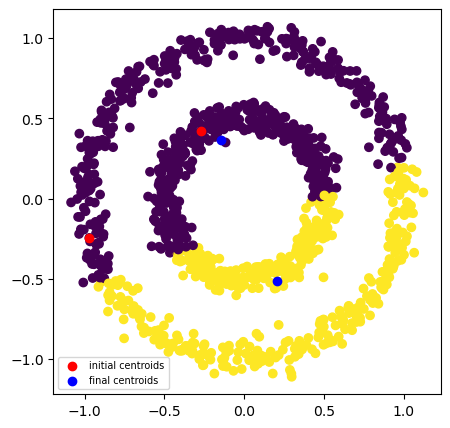

In [180]:
fig, axs = plt.subplots(figsize=(5,5))
X , y = datasets.make_circles(n_samples=1200, factor=0.5, noise=0.05)
k = Kmeans(nclusters=2, random_state=2, init_method='kpp')
y_pred = k.fit_predict(X)
center_init, final_centroid = k.return_centroids(X)
axs.scatter(X[:, 0], X[:, 1], c=y_pred)
axs.scatter(center_init[:,0], center_init[:,1], color='red', label='initial centroids')
axs.scatter(final_centroid[:,0], final_centroid[:,1], color='blue', label='final centroids')
plt.legend(loc='lower left', fontsize=7)

### Are there other methods that can handle this data better?
There are several methods that can be used to handle non-convex clustering problems with k-means++. Some of these methods are:
1. Spectral clustering: Its a clustering technique that can handle non-convex clusters. It works by transforming the data into a new space using the graph Laplacian, and then clustering the transformed data using k-means or another clustering algorithm.
2. Hierarchical clustering: Its a clustering technique that builds a tree-like structure of nested clusters. It can handle non-convex clusters by recursively splitting clusters into smaller subclusters based on the number of clusters specified.
3. Density-based clustering: Techniques like DBSCAN and OPTICS are density based clustering methods that can handle non-convex clusters by identifying areas of high density in the data and clustering points within those areas. They do not depend on a specified number of clusters, and can identify clusters of random shape or data cloud.

Lets focus on spectral clustering and see how it works.

<font size=6><p style="text-align: center;">Spectral Clustering</p></font><br>

Spectral clustering uses graph structure of data that may notbe convex in nature or well separated in feature space. It works on the similarity matrix of the data points and projects it on lower dimension using eigen values and vectors making it easier and effective for the algorithm to identify the clusters in this space. Spectral clustering are generally useful for datasets with complex or non-linear relationships between the data points.

### How does it work?
1. Start by constructing a similarity matrix that shows the similarity of each point in the set with all the other points. This can be done using different measures like cosine similarity, gaussian kernel similarity, euclidean distance, manhattan distance, haversine similarity etc.
2. Now compute the laplacian or graph laplacian matrix that summarizes the graph structure of the similarity matrix. We generally use normalized graph Laplacian. The normalized graph Laplacian is defined as L = S - D^(-1/2) W D^(-1/2), where W is the similarity matrix, D is the diagonal matrix of node degrees, and S is the identity matrix.
3. Compute eigenvectors and eigenvalues of the Laplacian matrix using eigen value decomposition technique.
4. From the eigenvalues and eigenvectors we project the data to lower dimension which is then used or passed to normal k-means clustering or other clustering method.

#### Lets check how the spectral clustering helps with the non convex clustering issue
On the same data we use clustering.SpecCluster fit_predict method. (For any implementation details check clustering.py)

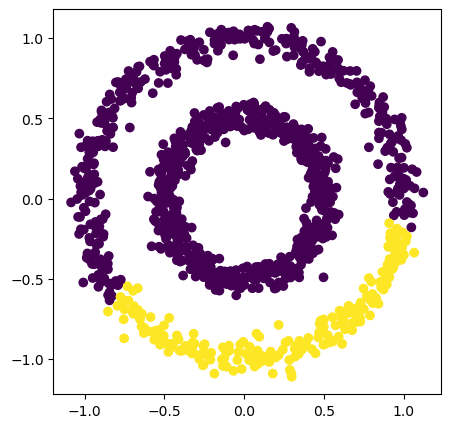

In [190]:
from clustering import *
fig, axs = plt.subplots(figsize=(5, 5))
k = SpecCluster(nclusters=2)
y_pred = k.fit_predict(X)
axs.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

/Users/itysoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


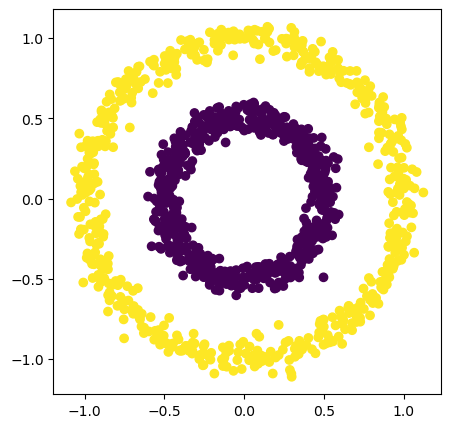

In [185]:
from sklearn.cluster import SpectralClustering
fig, axs = plt.subplots(figsize=(5, 5))
k = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=6)
y_pred = k.fit_predict(X)
axs.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

### Time complexity of Spectral clustering method
The time complexity of spectral clustering depends on several factors like the number of data points, the number of clusters, and the method used to compute the eigenvectors of the laplacian matrix. Steps in this methods:
1. Similarity matrix generation which takes O(n^2) time
2. Laplacian matrix calculation also takes O(n^2) runtime
3. Dimensionality reduction or calculating eigenvalues and eigen vectors of laplacian matrix. This step is very computationally expensive and has time complexity generally O(n^3). This also dependson the method used to compute eigen value decomposition. The fastest method to compute this decomposition takes O(n^2.3737)
4. Perform Kmeans which takes O(n*k*d)
Since the dominating step is eigen value decomposition, the overall time complexity is O(n^3). Hence, when working on very large dataset, this mmethod can be very slow. There are methods that take relatively low time and space like hierarchical clustering and density based clustering. 

<font size=6><p style="text-align: center;">Summary</p></font><br>
Clustering is a powerful technique to identify patterns and categorize data. This very useful when you do not have labeled data but depending on the type of data that is available, different clustering techniques should be used as discussed in various examples. Clustering has a wide variety of applications like image segmentation, document clustering, and customer segmentation etc.
There is a lot more to clustering techniques but this notebook only limits to the three methods discussed.